In [1]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
list_data_x = []
list_data_y = []
list_tip_x = []   #for all the SDR tips at Time_compare
list_tip_y = []
list_tip_time_x = []  # for SDR tip trace from Time_wt_start to Time_wt_end
list_tip_time_y = []

In [3]:
N_SDR = 16
list_particle_number = []
for i in range(1,N_SDR+1):
    if i < 10:
        list_particle_number.append(("0"+str(i)))
    else:
        list_particle_number.append((str(i)))

In [4]:
#----------------------------
# 2. FLAC model parameters
#----------------------------
num_particles = 600        #number of particles for each SDR
time_steps = 800          #total FLAC model steps
dt_step = 20.*1000 #[yr] FLAC time step for data output
yr_in_Myr = 10.**6 #[yr]

Time_compare = 16. # [Myr]   #plotting time for each SDRj

for i in range(N_SDR):
    particle_number = list_particle_number[i]
    print("#particle=", particle_number)
    #----------------------------
    # 1. for getting FLAC data
    #----------------------------
    Plate_thickness = "15"     # Hd in the model
    # particle_number = "02"     # which SDR particle
    
    # Get data from FLAC
    #----------------------------
    #FLAC_file_path=("/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20180112-Davis_2017_rheo-BC700C-dike_through-Nu3_6_10km_600C/BC900_plag-rem-mantle-dike-crust_newtherm/")
    FLAC_file_path=("/Volumes/Kelvin_2017/Thesis_Columbia/My_papers/Tian-Buck-2019-JGR-SDR_lithospheric_thickness/1Codes/FLAC_SDR/EVP_therm_mantle/20180112/BC900_plag-rem-mantle-dike-crust_newtherm")
    FLAC_data = open(FLAC_file_path+"/particles_"+particle_number+".0",'rb')
    data = np.fromfile(FLAC_data, dtype=np.single)
    FLAC_data.close()
    data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
    data_matrix_x = data_matrix[:,0,:]
    data_matrix_y = data_matrix[:,1,:]

    time_data_comparison = Time_compare * yr_in_Myr 
    #[yr]  compare data at 1 Myr  (relative time, for SDR 10 at 10Myr is when it experience 1Myr of load)
    TIME = Time_compare 
    steps = int(np.ceil(TIME * yr_in_Myr / dt_step)) - 1 # the step in FLAC correspond to time_data_comparison
    
    # fetch useful data at corresponding time
    print(steps)
    data_x = data_matrix_x[:,steps]
    data_y = data_matrix_y[:,steps]
    
    list_data_x.append(data_x[:])
    list_data_y.append(data_y[:])
    list_tip_x.append(data_x[0])
    list_tip_y.append(data_y[0])
    
    # fetch data for Wt, race of tip of SDRs in the last Myr
    Time_wt_start = 15. # Myrs
    Time_wt_end = 16. # Myrs
    Time_data_wt_start = Time_wt_start * yr_in_Myr
    Time_data_wt_end = Time_wt_end * yr_in_Myr
    wt_steps_start = int(np.ceil(Time_data_wt_start / dt_step)) - 1 # the step in FLAC correspond to time_data
    wt_steps_end = int(np.ceil(Time_data_wt_end / dt_step)) - 1
    wt_N_steps = wt_steps_end - wt_steps_start
    print("wt_steps_start = ", wt_steps_start)
    print("wt_steps_end = ", wt_steps_end)
    wt_data_x = data_matrix_x[0,wt_steps_start:wt_steps_end]
    wt_data_y = data_matrix_y[0,wt_steps_start:wt_steps_end]
    
    list_tip_time_x.append(wt_data_x[::-1])  # ::-1 so as to get from largest to the smallest continuously
    list_tip_time_y.append(wt_data_y[::-1])  # wt from rightmost to left

#particle= 01
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 02
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 03
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 04
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 05
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 06
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 07
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 08
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 09
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 10
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 11
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 12
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 13
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 14
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 15
799
wt_steps_start =  749
wt_steps_end =  799
#particle= 16
799
wt_steps_start =  749
wt_steps_end =  799


In [5]:
FLAC_file_path

'/Volumes/Kelvin_2017/Thesis_Columbia/My_papers/Tian-Buck-2019-JGR-SDR_lithospheric_thickness/1Codes/FLAC_SDR/EVP_therm_mantle/20180112/BC900_plag-rem-mantle-dike-crust_newtherm'

In [6]:
#help(plt.plot)

In [7]:
#processing the temporally varying tracer data
# list_tip_time_x-->list_tip_time_x_con-->list_tip_time_x_plt-->Wtx
list_tip_time_x_con = np.concatenate(list_tip_time_x)
list_tip_time_y_con = np.concatenate(list_tip_time_y)
N_start_SDR = 3 #<> #remove the first couple SDRs
remove_point = -1 #<> # and take out the on axis point (:-1)
list_tip_time_x_plt = list_tip_time_x_con[N_start_SDR*wt_N_steps:remove_point] #remove the first couple SDRs
list_tip_time_y_plt = list_tip_time_y_con[N_start_SDR*wt_N_steps:remove_point] # and take out the on axis point (:-1)
Wtx = list_tip_time_x_plt[::-1] # from axis to further away, reverse the sequence
Wty = list_tip_time_y_plt[::-1]

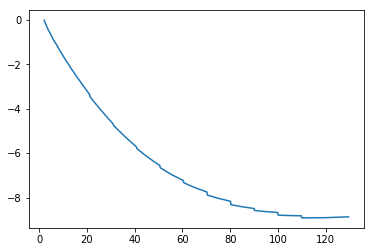

In [8]:
plt.plot(list_tip_time_x_plt,list_tip_time_y_plt) # [0:] 0 means the furthest SDR
plt.show()

4
6
8
10
12
14
index in Wtx for Xf is 553
Xf = 108.632 [km] W0= -8.91763
use number of SDR equal to 5 at Xf
the corresponding time step for the 06 th SDR is 793


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:1767: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:1767: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:1768: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:1768: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:1769: RuntimeWarning: divide by zero enco

the angle phi at Xf equals  12.897784003821782


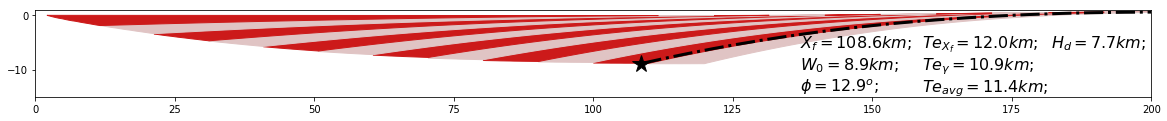

In [9]:
#-----------------------------
#setting figure configuration
#-----------------------------
resources_path="/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/"
fig = plt.gcf()
#plt.grid()
#<> adjust ylim for covering the thickness of SDRs
xmin = 0
xmax = 200
ymin = -15
ymax = 1
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
#fig.set_size_inches(15, 1)
figurewidth = 20
figureheight = (ymax-ymin)/(xmax-xmin)*figurewidth #in order to be 1:1 VE=1
fig.set_figwidth(figurewidth)
fig.set_figheight(figureheight)
#---------------------
#specify the color
#---------------------
pink = (0.88,0.77,0.77)
darkred = (0.8,0.1,0.1)
lightgreen = (0,1,0.3)

#----------------------------------------
# ploting each SDR and filling in between
#----------------------------------------
# fill 
#help(plt.fill_between)
#/opt/local/share/py35-matplotlib/examples/pylab_examples/fill_spiral.py
for i in range(N_SDR):
    #ploting each SDR at Time_compare
    #plt.plot(list_data_x[i][:],list_data_y[i][:],color = lightgreen,linestyle='dashed',linewidth=3.9)
    # skipping first several SDRs
    if (i<=N_start_SDR):
        do_nothing = 1
    elif (i==0): # filling the last SDR wedge furthest away from axis
        xf = np.concatenate((list_data_x[i][:],list_data_x[i+1][::-1]))
        yf = np.concatenate((list_data_y[i][:],list_data_y[i+1][::-1]))
        plt.fill(xf,yf,color=pink)        
    elif (i%2==0 and (i+1) <= (N_SDR-1) ): # remainder of i / 2, when i is even and not beyond max i
        print(i)
        xf = np.concatenate((list_data_x[i][:],list_data_x[i+1][::-1],list_tip_time_x[i][::-1]))
        yf = np.concatenate((list_data_y[i][:],list_data_y[i+1][::-1],list_tip_time_y[i][::-1]))
        plt.fill(xf,yf,color=pink)
    elif((i+1) <= (N_SDR-1) and i>=1):
        xf = np.concatenate((list_data_x[i][:],list_data_x[i+1][::-1],list_tip_time_x[i][::-1]))
        yf = np.concatenate((list_data_y[i][:],list_data_y[i+1][::-1],list_tip_time_y[i][::-1]))
        plt.fill(xf,yf,color=darkred)
    # for filling in surface and the last SDR
    else:
        #xf = np.append(list_data_x[N_SDR-1][:],list_tip_time_x[N_SDR-1][::-1][1:])
        #yf = np.append(list_data_y[N_SDR-1][:],list_tip_time_y[N_SDR-1][::-1][1:])
        xf = np.append(list_data_x[i][:],list_tip_time_x[i][::-1][1:])  #*<>*skip the first point(1:)
        yf = np.append(list_data_y[i][:],list_tip_time_y[i][::-1][1:])
        plt.fill(xf,yf,color=darkred)

#plotting Wt
#plt.plot(Wtx,Wty,'r-',linewidth=3.5)
#plotting each SDR tip
#plt.plot(list_tip_x[:],list_tip_y[:],"k.",markersize = 12) # ploting SDR tips
#------------------------------------------------
#finding Xf and plotting the corresponding SDR
# find the index in Wtx for Xf
kk = np.gradient(Wty,Wtx)
kk_bool = kk > 0  #finding where gradient switch from negative to positive
for i in range(np.size(kk)):
    if (kk_bool[i-1] == False and kk_bool[i] == True and kk_bool[i+1] == True and kk_bool[i+2] == True):
        print("index in Wtx for Xf is",i)
        Xf_index = i
        break
Xf = Wtx[Xf_index] - Wtx[0]  #- Wtx[0] for taking into account the width of the dike
W0 = Wty[Xf_index]
print("Xf =", Xf, "[km]","W0=",W0)
#plotting Xf
plt.plot(Xf,W0,'k*',markersize=18)
#-------------------------------
#ploting the Xf corresponding SDR
# finding the which particle/SDR closest to the right of Xf
for i in range(np.size(list_tip_x)):
    if(list_tip_x[i] < Xf):  # loop from the rightmost tip to axis
        print("use number of SDR equal to", i-1, "at Xf")
        Xf_SDRindex = i-1
        break
#plt.plot(list_data_x[Xf_SDRindex][:],list_data_y[Xf_SDRindex][:],'r-.',linewidth=3)
dist_Xf_SDRtip = list_data_x[Xf_SDRindex][0] - Xf
# find the time difference in time steps between closest SDR tip to Xf
dist_per_Myr = 10 #km
delta_timestep_Xf_SDRtip = dist_Xf_SDRtip / dist_per_Myr * yr_in_Myr / dt_step 
#find the corresponding time step for the SDR when it was at Xf
step_Xf = int(time_steps - np.ceil(delta_timestep_Xf_SDRtip))
# fetch useful data at corresponding time
if Xf_SDRindex+1 < 10:
    particle_number_Xf_SDRindex=("0"+str(Xf_SDRindex+1))
else:
    particle_number_Xf_SDRindex=(str(Xf_SDRindex+1))
FLAC_data = open(FLAC_file_path+"/particles_"+particle_number_Xf_SDRindex+".0",'rb')
data = np.fromfile(FLAC_data, dtype=np.single)
FLAC_data.close()
data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
data_matrix_x = data_matrix[:,0,:]
data_matrix_y = data_matrix[:,1,:]
print("the corresponding time step for the", particle_number_Xf_SDRindex, 'th SDR is', step_Xf)
the_SDR_x = data_matrix_x[:,step_Xf]
the_SDR_y = data_matrix_y[:,step_Xf]
#plotting the SDR corresponding to Xf
plt.plot(the_SDR_x,the_SDR_y,'k-.',linewidth=3)
#-------------------------------
# finding phi for THE SDR
phi = math.degrees(math.atan(np.gradient(the_SDR_y,the_SDR_x)[0]))
print("the angle phi at Xf equals ", phi)

# ------------------------------------------
# calculating Te, hd based on Xf, gamma, phi
# ------------------------------------------

# model parameters
gamma = abs(W0) / math.tan(math.radians(phi))

#finding Te from Xf and gamma
#parameter setup
# 1. initialization/ parameter input
E = 7.5*10**10 # Young's modulus [Pa]
g = 10 # gravitational acc [m/s**2]
mu = 0.25 # poisson's ratio
delrhoC = 200 # for pure lava [kg/m^3]
delrhoD = 200 # density difference between solidified and fluid dike

Xf_m = Xf * 1000 #convert km to meters
alpha_xf = 2.0 * Xf_m / math.pi  #[m]
kappa = (E / (3 * delrhoC * g * (1 - mu**2)))**0.25 #coeficient between alpha_xf and Te_xf**0.75 [m] 
Te_xf = (alpha_xf / kappa)**(4.0/3.0) #[m]
Te_xf_km = Te_xf/1000.
coeff  = 2 * delrhoD / delrhoC**0.75 * (E / (3 * g * (1 - mu**2)))**(-0.25)
     
# Te from gamma
Ws = abs(W0)
dip = phi
alpha_ratio = 2 * (Ws / math.tan(math.radians((dip))) / (1 + math.exp(-math.pi / 2))) *1000
Te_ratio = (alpha_ratio / kappa)**(4.0/3.0) #[m]
Te_ratio_km = Te_ratio/1000.
# calulate Hd using phi and W
Te_avg = 0.5 * (Te_xf + Te_ratio)
Te_avg_km = 0.5 * (Te_xf_km + Te_ratio_km)
hd = math.tan(math.radians(phi)) / coeff * Te_avg**0.75
hd_km = hd/1000.
Te_dw = 12500
Te_final_avg = 0.5*(Te_avg + Te_dw)
#<>
down_offset = -3
hori_offset = 22
text_fontsize = 16
plt.text(xmax-100+hori_offset+15, ymax-4+down_offset, r'$X_f = {:.1f} km;$'.format(Xf), fontsize=text_fontsize)
plt.text(xmax-100+hori_offset+15, ymax-8+down_offset, r'$W_0 = {:.1f} km;$'.format(abs(W0)), fontsize=text_fontsize)
plt.text(xmax-100+hori_offset+15, ymax-12+down_offset, r'$\phi = {:.1f}^o;$'.format(phi), fontsize=text_fontsize)
#plt.text(xmax-70, ymax-4, "$Te$ $_Xf = {:.1f} km;$".format(Te_xf/1000), fontsize=22)
plt.text(xmax-70+hori_offset+7, ymax-4+down_offset, "$Te_{X_f} = %.1f km;$" %Te_xf_km, fontsize=text_fontsize)
plt.text(xmax-70+hori_offset+7, ymax-8+down_offset, "$Te_\gamma = %.1f km;$" %Te_ratio_km, fontsize=text_fontsize)
plt.text(xmax-70+hori_offset+7, ymax-12+down_offset, "$Te_{avg} = %.1f km;$" %Te_avg_km, fontsize=text_fontsize)
plt.text(xmax-40+hori_offset, ymax-4+down_offset, "$H_d = %.1f km;$" %hd_km, fontsize=text_fontsize)
#plt.text(xmax-100, ymax-10, r'$\phi = {:.1f}^o;$'.format(phi), fontsize=16)
#plt.text(xmax-25, ymin, r'$\sum_{i=0}^\infty x_i$', fontsize=12)

# for final PLOTING parameters
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
#plt.title("dw(x) during 20 kyrs for Newtonian EVP T1800 Hc=5 km",fontsize=20)
#plt.xlabel("Off-axis distance [km]",fontsize=16)
#plt.ylabel("Thickness\n[km]",fontsize=16)

plt.show()
fig.savefig(resources_path+'nonNewtonian_EVP-thermal-BTC900-plag-mantle-dike-crust-newtherm-tracer_16Myr_N_start_SDR5.pdf', dpi=300)

In [10]:
print("Xf = {:.1f} km;".format(Xf), "W0 = {:.1f} km;".format(W0), "phi = {:.1f} degrees;".format(phi))
print("Te_Xf = {:.2f} km;".format(Te_xf/1000),"Te_gamma= {:.2f} km;".format(Te_ratio/1000),
      "Te_avg= {:.1f} km;".format(Te_avg/1000))
print("hd = {:.2f} km".format(hd/1000))

Xf = 108.6 km; W0 = -8.9 km; phi = 12.9 degrees;
Te_Xf = 11.97 km; Te_gamma= 10.90 km; Te_avg= 11.4 km;
hd = 7.65 km
